# Importando datos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [3]:
# Leer el archivo CSV en un DataFrame
mpi_data = pd.read_csv('MPI_national.csv')

# Mostrar las primeras filas del DataFrame
print(mpi_data.head())

   ISO     Country  MPI Urban  Headcount Ratio Urban  \
0  KAZ  Kazakhstan      0.000                    0.0   
1  SRB      Serbia      0.000                    0.1   
2  KGZ  Kyrgyzstan      0.000                    0.1   
3  TUN     Tunisia      0.000                    0.1   
4  ARM     Armenia      0.001                    0.2   

   Intensity of Deprivation Urban  MPI Rural  Headcount Ratio Rural  \
0                            33.3      0.000                   0.09   
1                            41.4      0.002                   0.50   
2                            40.2      0.003                   0.70   
3                            35.6      0.012                   3.18   
4                            33.3      0.001                   0.39   

   Intensity of Deprivation Rural  
0                            33.3  
1                            40.3  
2                            37.1  
3                            38.7  
4                            36.9  


In [4]:
# Revisar información del dataset
mpi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ISO                             102 non-null    object 
 1   Country                         102 non-null    object 
 2   MPI Urban                       102 non-null    float64
 3   Headcount Ratio Urban           102 non-null    float64
 4   Intensity of Deprivation Urban  102 non-null    float64
 5   MPI Rural                       102 non-null    float64
 6   Headcount Ratio Rural           102 non-null    float64
 7   Intensity of Deprivation Rural  102 non-null    float64
dtypes: float64(6), object(2)
memory usage: 6.5+ KB


In [5]:
# Calcular la diferencia entre MPI Urbano y Rural
mpi_data['MPI Difference'] = mpi_data['MPI Urban'] - mpi_data['MPI Rural']

# Clasificación de países según la disparidad de pobreza
mpi_data['Poverty Disparity'] = mpi_data['MPI Difference'].apply(
    lambda x: 'Urban Favorable' if x < 0 else 'Rural Favorable' if x > 0 else 'Equal'
)

# Mostrar las primeras filas del DataFrame con las nuevas columnas
print(mpi_data.head())

   ISO     Country  MPI Urban  Headcount Ratio Urban  \
0  KAZ  Kazakhstan      0.000                    0.0   
1  SRB      Serbia      0.000                    0.1   
2  KGZ  Kyrgyzstan      0.000                    0.1   
3  TUN     Tunisia      0.000                    0.1   
4  ARM     Armenia      0.001                    0.2   

   Intensity of Deprivation Urban  MPI Rural  Headcount Ratio Rural  \
0                            33.3      0.000                   0.09   
1                            41.4      0.002                   0.50   
2                            40.2      0.003                   0.70   
3                            35.6      0.012                   3.18   
4                            33.3      0.001                   0.39   

   Intensity of Deprivation Rural  MPI Difference Poverty Disparity  
0                            33.3           0.000             Equal  
1                            40.3          -0.002   Urban Favorable  
2                         

In [6]:
# Resumen descriptivo de las variables numéricas
descriptive_stats = mpi_data.describe()
print("Resumen Descriptivo:")
print(descriptive_stats)

Resumen Descriptivo:
        MPI Urban  Headcount Ratio Urban  Intensity of Deprivation Urban  \
count  102.000000             102.000000                      102.000000   
mean     0.078343              16.809804                       41.678431   
std      0.093693              18.498448                        5.135908   
min      0.000000               0.000000                       33.300000   
25%      0.007250               1.950000                       37.200000   
50%      0.034500               8.400000                       41.550000   
75%      0.125750              27.575000                       45.675000   
max      0.459000              82.500000                       55.700000   

        MPI Rural  Headcount Ratio Rural  Intensity of Deprivation Rural  \
count  102.000000             102.000000                      102.000000   
mean     0.214676              40.036176                       46.824510   
std      0.201208              33.270714                        8.

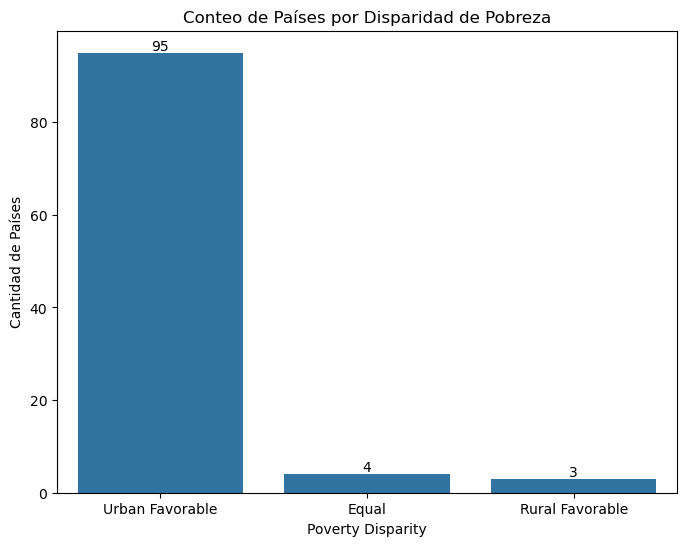

In [7]:
# Contar los países por categoría en Poverty Disparity
poverty_disparity_count = mpi_data['Poverty Disparity'].value_counts()

# Crear un gráfico de barras con el conteo
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=poverty_disparity_count.index, y=poverty_disparity_count.values)
plt.title('Conteo de Países por Disparidad de Pobreza')
plt.xlabel('Poverty Disparity')
plt.ylabel('Cantidad de Países')

# Añadir los valores de conteo encima de cada barra
for index, value in enumerate(poverty_disparity_count.values):
    ax.text(index, value + 0.5, str(value), ha='center')

plt.show()

In [8]:
# Obtener los nombres de los países para cada categoría de 'Poverty Disparity'
for category in mpi_data['Poverty Disparity'].unique():
    countries_in_category = mpi_data[mpi_data['Poverty Disparity'] == category]['Country'].tolist()
    print(f"\nPaíses en la categoría '{category}':")
    print(countries_in_category)


Países en la categoría 'Equal':
['Kazakhstan', 'Armenia', 'Turkmenistan', 'Bosnia and Herzegovina']

Países en la categoría 'Urban Favorable':
['Serbia', 'Kyrgyzstan', 'Tunisia', 'Macedonia, The former Yugoslav Republic of', 'Moldova, Republic of', 'Guyana', 'Saint Lucia', 'Mexico', 'Thailand', 'Algeria', 'Albania', 'Ukraine', 'Uzbekistan', 'Jamaica', 'Ecuador', 'Maldives', 'Jordan', 'Belize', 'China', 'Egypt', 'Suriname', 'Colombia', 'Morocco', 'Azerbaijan', 'El Salvador', 'Mongolia', 'Syrian Arab Republic', 'Peru', 'Viet Nam', 'South Africa', 'Nicaragua', 'Brazil', 'Trinidad and Tobago', 'Bhutan', 'Bolivia, Plurinational State of', 'Tajikistan', 'Swaziland', 'Honduras', 'Iraq', 'Cambodia', 'Dominican Republic', 'Nepal', "Lao People's Democratic Republic", 'Zimbabwe', 'Philippines', 'Vanuatu', 'Indonesia', 'Myanmar', 'Lesotho', 'Gabon', 'Guatemala', 'India', 'Sao Tome and Principe', 'Ghana', 'Kenya', 'Yemen', 'Togo', 'Comoros', 'Pakistan', 'Namibia', 'Cameroon', 'Malawi', 'Bangladesh

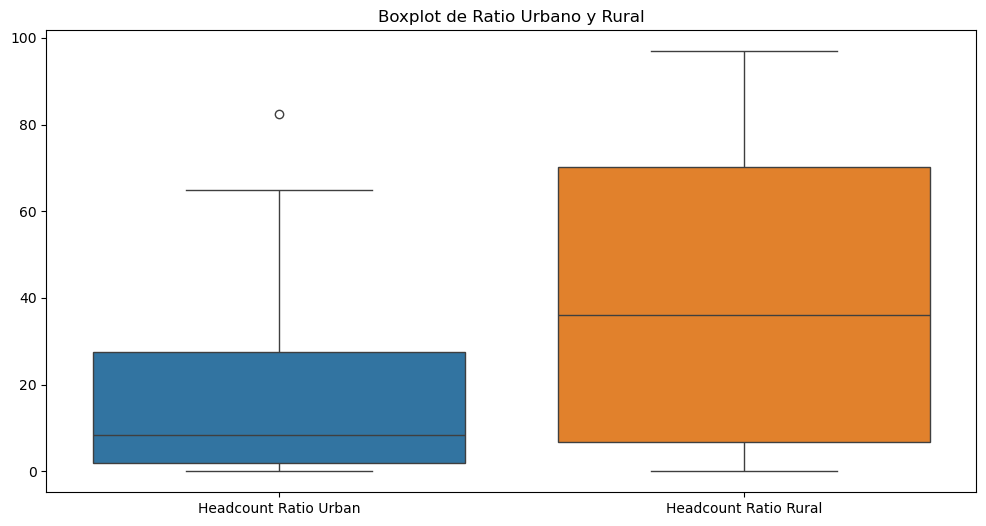

In [9]:
# Boxplots para detectar outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=mpi_data[['Headcount Ratio Urban', 'Headcount Ratio Rural']])
plt.title('Boxplot de Ratio Urbano y Rural')
plt.show()

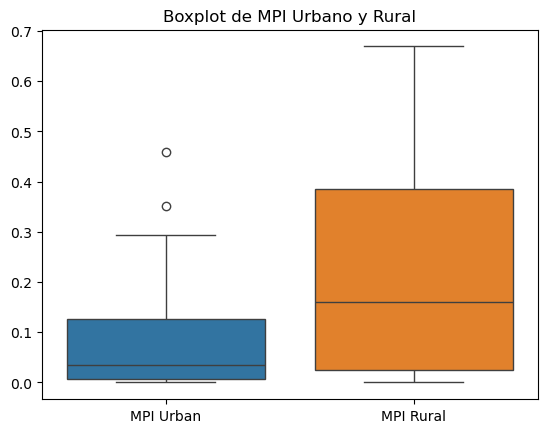

In [10]:
sns.boxplot(data=mpi_data[['MPI Urban', 'MPI Rural']])
plt.title('Boxplot de MPI Urbano y Rural')
plt.show()

In [11]:
# Diccionario de países agrupados por continentes
continent_dict = {
    "África": [
        "Tunisia", "Algeria", "Morocco", "Egypt", "South Africa", "Swaziland",
        "Zimbabwe", "Lesotho", "Gabon", "Sao Tome and Principe", "Ghana", "Kenya",
        "Togo", "Comoros", "Namibia", "Cameroon", "Malawi", "Rwanda", "Madagascar",
        "Mauritania", "Zambia", "Nigeria", "Uganda", "Sudan", "Senegal",
        "Cote d'Ivoire", "Guinea", "Gambia", "Mali", "Mozambique", "Benin",
        "Guinea-Bissau", "Burundi", "Burkina Faso", "Congo, Democratic Republic of the",
        "Ethiopia", "Sierra Leone", "Niger", "Central African Republic", "Liberia",
        "Somalia", "Chad", "South Sudan", "Djibouti"
    ],
    "Asia": [
        "Kazakhstan", "Kyrgyzstan", "Turkmenistan", "Uzbekistan", "Tajikistan",
        "Armenia", "Mongolia", "Thailand", "China", "Viet Nam", "Cambodia",
        "Myanmar", "Philippines", "Indonesia", "Lao People's Democratic Republic",
        "India", "Pakistan", "Bangladesh", "Nepal", "Maldives", "Sri Lanka",
        "Bhutan", "Afghanistan", "Yemen", "Jordan", "Iraq", "Syrian Arab Republic"
    ],
    "Europa": [
        "Serbia", "Macedonia, The former Yugoslav Republic of", "Moldova, Republic of",
        "Montenegro", "Bosnia and Herzegovina", "Albania", "Ukraine"
    ],
    "América del Norte": [
        "Mexico", "Belize"
    ],
    "América del Sur": [
        "Guyana", "Ecuador", "Colombia", "El Salvador", "Peru", "Nicaragua",
        "Brazil", "Bolivia, Plurinational State of", "Honduras", "Dominican Republic",
        "Guatemala", "Trinidad and Tobago", "Barbados", "Jamaica", "Haiti",
        "Saint Lucia"
    ],
    "Oceanía": [
        "Vanuatu"
    ]
}

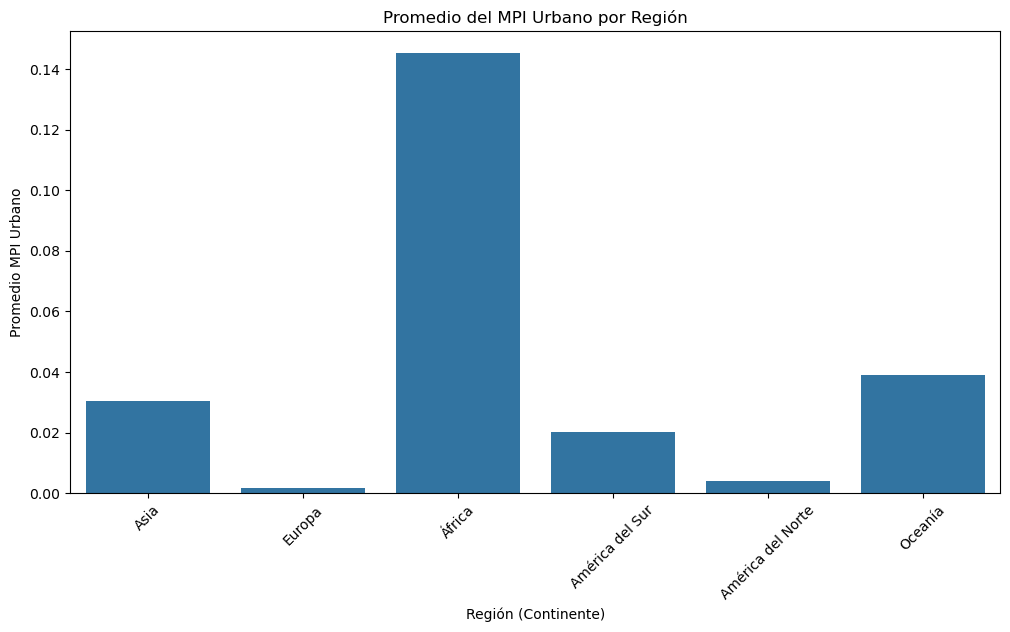

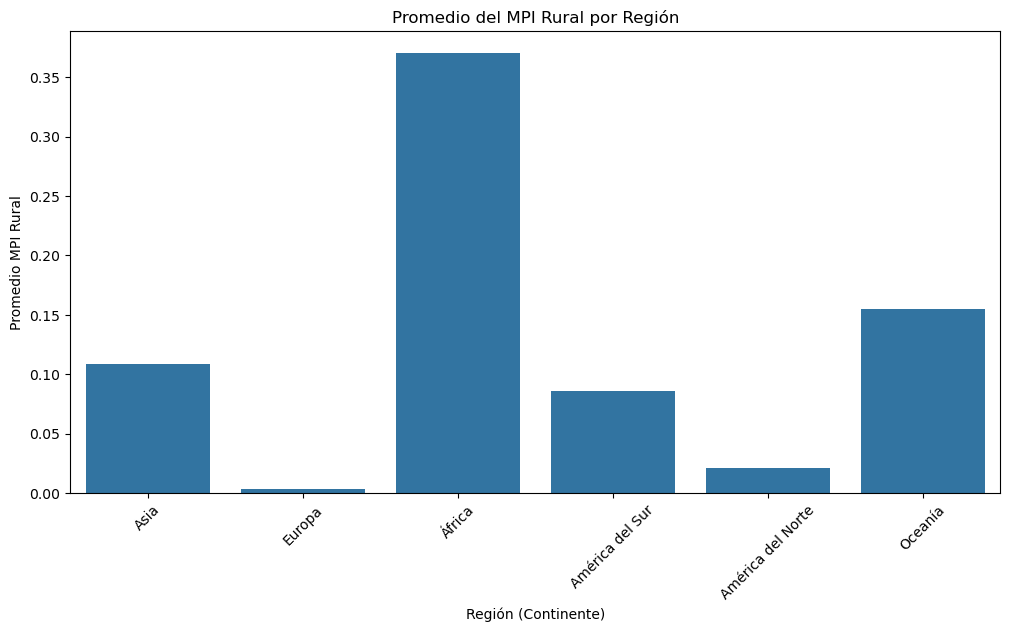

In [14]:
# Crear una columna 'Continent' basada en el diccionario de continentes
def assign_continent(country):
    for continent, countries in continent_dict.items():
        if country in countries:
            return continent
    return None

# Asignar los continentes a los países
mpi_data['Continent'] = mpi_data['Country'].apply(assign_continent)

# Gráfico de barras para visualizar los promedios del MPI Urban por región
plt.figure(figsize=(12, 6))
sns.barplot(x='Continent', y='MPI Urban', data=mpi_data, estimator=np.mean, errorbar=None)
plt.title('Promedio del MPI Urbano por Región')
plt.ylabel('Promedio MPI Urbano')
plt.xlabel('Región (Continente)')
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras para visualizar los promedios del MPI Rural por región
plt.figure(figsize=(12, 6))
sns.barplot(x='Continent', y='MPI Rural', data=mpi_data, estimator=np.mean, errorbar=None)
plt.title('Promedio del MPI Rural por Región')
plt.ylabel('Promedio MPI Rural')
plt.xlabel('Región (Continente)')
plt.xticks(rotation=45)
plt.show()

In [15]:

# Filtrar los datos que no tienen un continente asignado (si es necesario)
mpi_data_filtered = mpi_data.dropna(subset=['Continent'])

# Seleccionar las columnas necesarias para el ANOVA
df_anova = mpi_data_filtered[['Continent', 'MPI Urban']]

# Agrupar los datos por 'Continent'
grouped_anova = df_anova.groupby('Continent')

# Obtener los grupos de datos por continente
group_africa = grouped_anova.get_group('África')['MPI Urban']
group_asia = grouped_anova.get_group('Asia')['MPI Urban']
group_europe = grouped_anova.get_group('Europa')['MPI Urban']
group_north_america = grouped_anova.get_group('América del Norte')['MPI Urban']
group_south_america = grouped_anova.get_group('América del Sur')['MPI Urban']
group_oceania = grouped_anova.get_group('Oceanía')['MPI Urban']

# Realizar el test ANOVA de un solo factor
F_stat, p_val = stats.f_oneway(
    group_africa,
    group_asia,
    group_europe,
    group_north_america,
    group_south_america,
    group_oceania
)

# Resultados del ANOVA
print("Resultados ANOVA")
print(f"F = {F_stat}")
print(f"p = {p_val}")

Resultados ANOVA
F = 13.19778771909125
p = 1.2146061735621204e-09


# Exploración de Datos

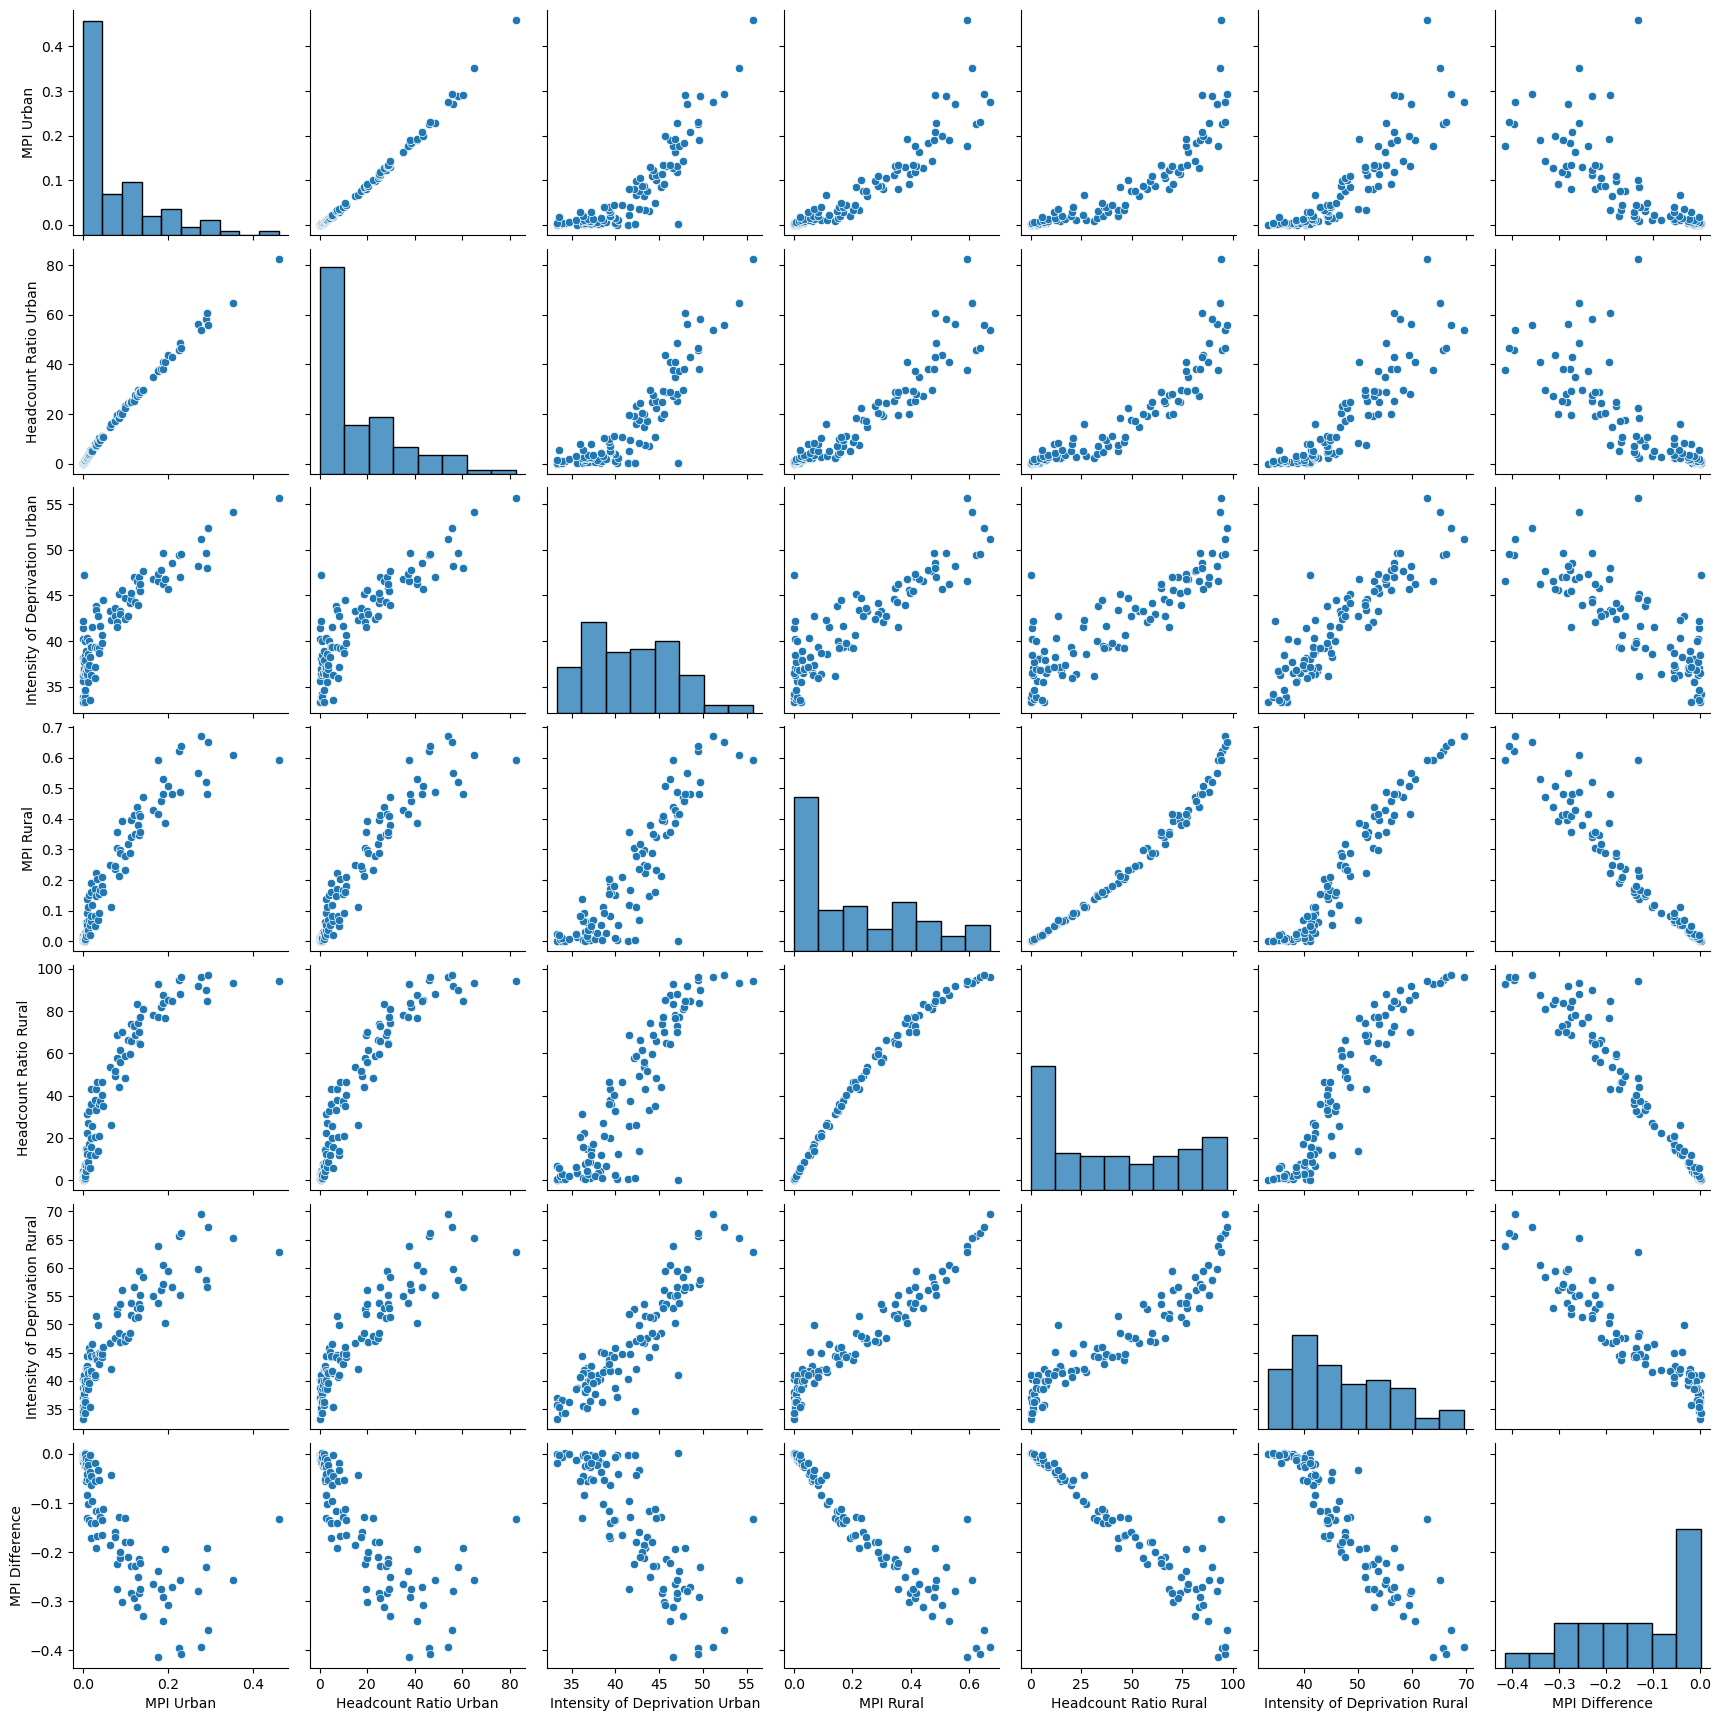

In [16]:
sns.pairplot(data = mpi_data)

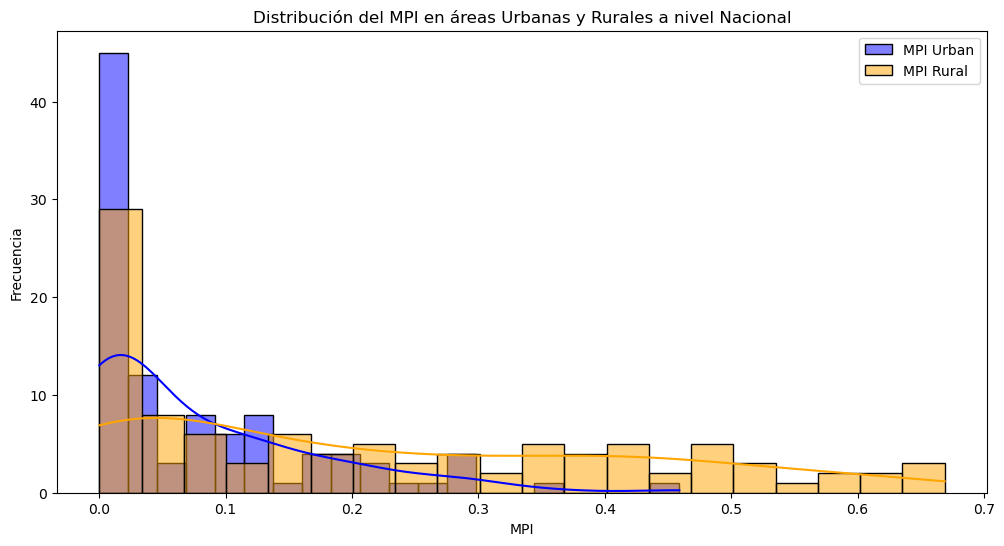

In [17]:
# Histogramas de las variables MPI Urban y MPI Rural
plt.figure(figsize=(12, 6))
sns.histplot(mpi_data['MPI Urban'], bins=20, kde=True, color='blue', label='MPI Urban')
sns.histplot(mpi_data['MPI Rural'], bins=20, kde=True, color='orange', label='MPI Rural')
plt.title('Distribución del MPI en áreas Urbanas y Rurales a nivel Nacional')
plt.xlabel('MPI')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

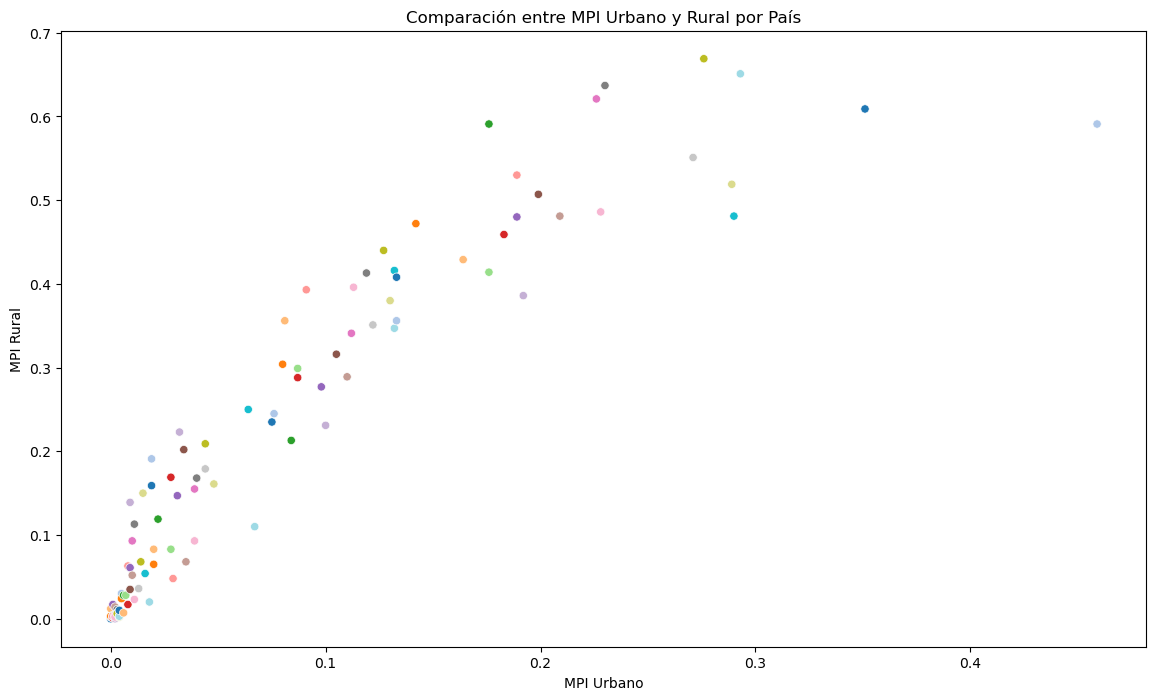

In [18]:
# Comparación MPI Urbano vs Rural por País
plt.figure(figsize=(14, 8))
sns.scatterplot(data=mpi_data, x='MPI Urban', y='MPI Rural', hue='Country', palette='tab20', legend=None)
plt.title('Comparación entre MPI Urbano y Rural por País')
plt.xlabel('MPI Urbano')
plt.ylabel('MPI Rural')
plt.show()

# Análisis de Correlación

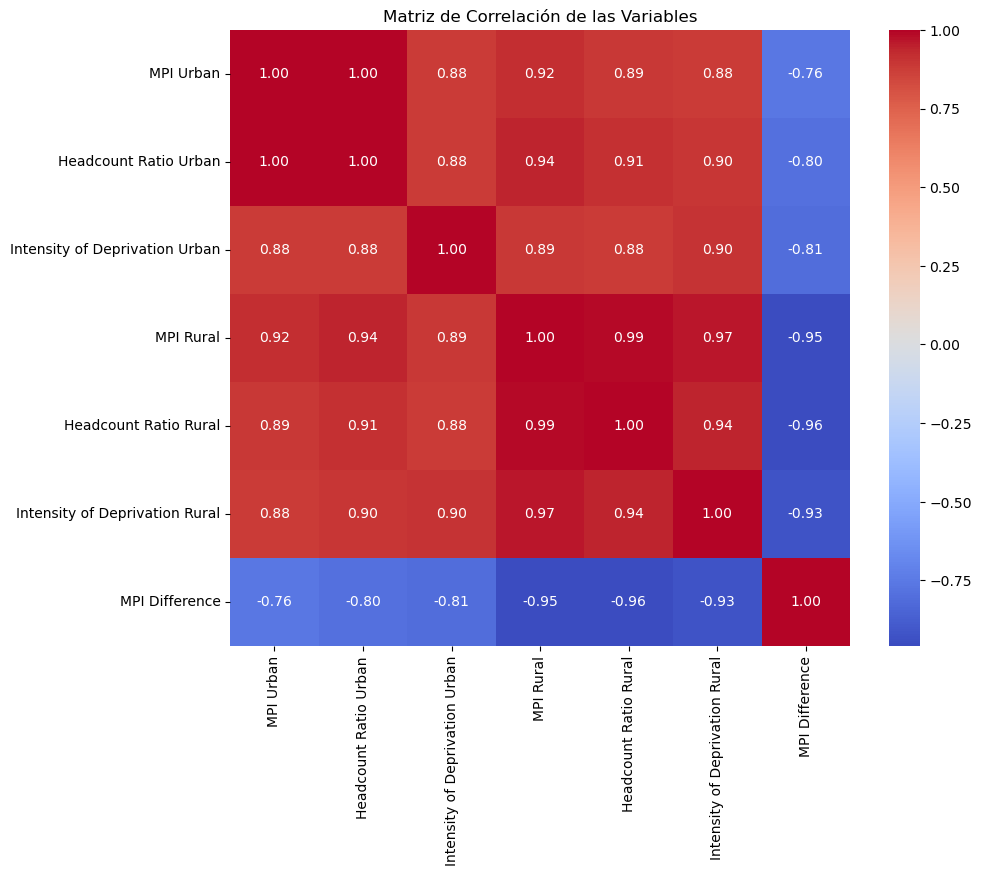

In [19]:
# Filtrar solo las columnas numéricas para calcular la matriz de correlación
numeric_columns = mpi_data.select_dtypes(include=['float64', 'int64'])

# Matriz de correlación de variables
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de las Variables')
plt.show()


# Modelado: Regresión

Mean Squared Error (MSE): 0.0038671693297310968
R-squared (R2): 0.9101033736685537


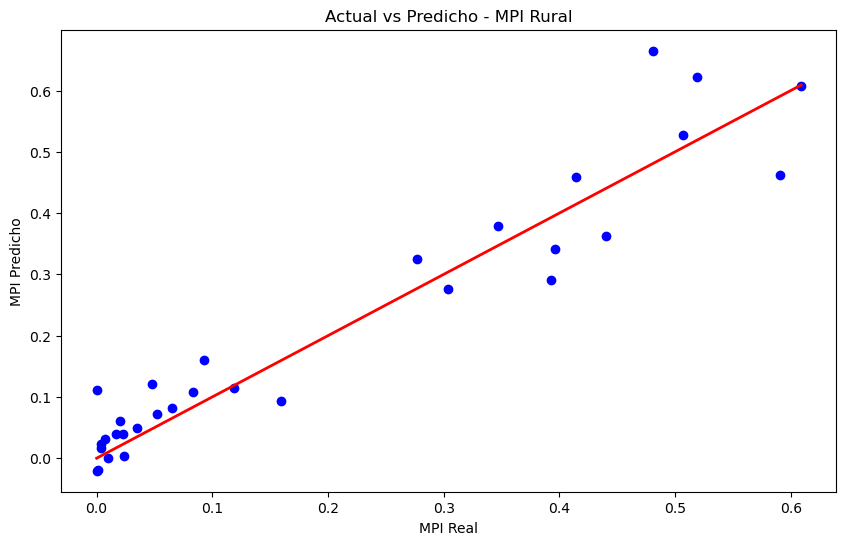

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Definir variables independientes y dependientes
X = mpi_data[['MPI Urban', 'Headcount Ratio Urban', 'Intensity of Deprivation Urban']]
y = mpi_data['MPI Rural']

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar modelo de regresión
model = LinearRegression()
model.fit(X_train, y_train)

# Predicción y evaluación
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Actual vs Predicho - MPI Rural')
plt.xlabel('MPI Real')
plt.ylabel('MPI Predicho')
plt.show()

Mean Squared Error (MSE): 0.00012623576451612853
R-squared (R2): 0.9970655100967197


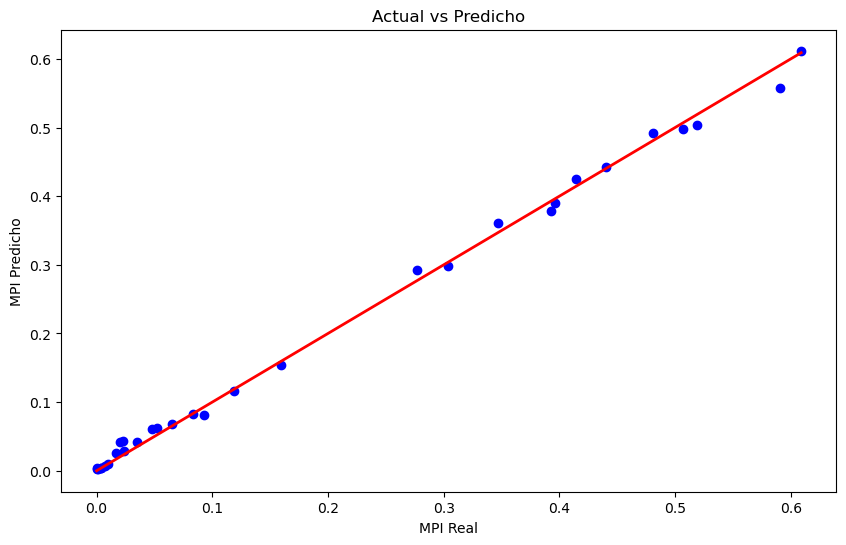

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Definir variables independientes y dependientes
X_reg = mpi_data[['MPI Urban', 'Headcount Ratio Urban', 'Intensity of Deprivation Urban',
                  'Headcount Ratio Rural', 'Intensity of Deprivation Rural']]
y_reg = mpi_data['MPI Rural']

# Dividir en conjuntos de entrenamiento y prueba
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Entrenar un modelo de regresión
reg_model = RandomForestRegressor(random_state=42)
reg_model.fit(X_train_reg, y_train_reg)

# Predicción y evaluación del modelo
y_pred_reg = reg_model.predict(X_test_reg)
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
r2_reg = r2_score(y_test_reg, y_pred_reg)

print(f"Mean Squared Error (MSE): {mse_reg}")
print(f"R-squared (R2): {r2_reg}")

# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, color='blue')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], color='red', lw=2)
plt.title('Actual vs Predicho')
plt.xlabel('MPI Real')
plt.ylabel('MPI Predicho')
plt.show()

## Regresión (Red Neuronal)

MSE: 0.009797364195878781
R2 Score: -0.04957054020298646


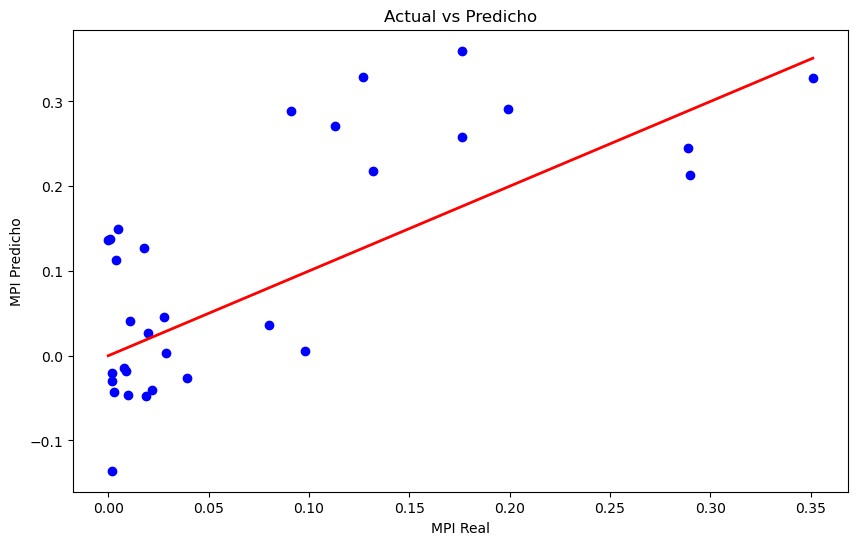

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Variables predictoras y objetivo
X = mpi_data[['Headcount Ratio Urban', 'Intensity of Deprivation Urban', 'MPI Rural']]
y = mpi_data['MPI Urban']

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalado de las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creación del modelo de red neuronal para regresión
regressor = MLPRegressor(hidden_layer_sizes=(40,), max_iter=1000, random_state=42)
regressor.fit(X_train_scaled, y_train)

# Predicción
y_pred = regressor.predict(X_test_scaled)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R2 Score: {r2}")

# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Actual vs Predicho')
plt.xlabel('MPI Real')
plt.ylabel('MPI Predicho')
plt.show()

# Modelado Clasificación

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Definir variables independientes y dependientes
X_class = mpi_data[['MPI Urban', 'Headcount Ratio Urban', 'Intensity of Deprivation Urban',
                    'MPI Rural', 'Headcount Ratio Rural', 'Intensity of Deprivation Rural']].dropna()
y_class = mpi_data['Poverty Disparity'].map({'Urban Favorable': 0, 'Rural Favorable': 1, 'Equal MPI': 2}).dropna()

# Asegurarse de que las dimensiones coincidan después de eliminar NaN
X_class = X_class.loc[y_class.index]

# Dividir en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Modelos
# Regresión logística
lr_model = LogisticRegression(max_iter=400, tol=1e-6)
lr_model.fit(X_train_class, y_train_class)
y_pred_lr = lr_model.predict(X_test_class)
lr_accuracy = accuracy_score(y_test_class, y_pred_lr)

# Árbol de decisión
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_class, y_train_class)
y_pred_tree = tree_model.predict(X_test_class)
tree_accuracy = accuracy_score(y_test_class, y_pred_tree)

# Bosque aleatorio
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_class, y_train_class)
y_pred_rf = rf_model.predict(X_test_class)
rf_accuracy = accuracy_score(y_test_class, y_pred_rf)

print(f"Regresión Logística Accuracy: {lr_accuracy}")
print(f"Árbol de Decisión Accuracy: {tree_accuracy}")
print(f"Bosque Aleatorio Accuracy: {rf_accuracy}")

Regresión Logística Accuracy: 0.95
Árbol de Decisión Accuracy: 1.0
Bosque Aleatorio Accuracy: 1.0


## Clasificación (Red Neuronal)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Transformar la variable objetivo en categórica para clasificación
mpi_data['is_poor'] = (mpi_data['MPI Urban'] > mpi_data['MPI Urban'].median()).astype(int)

# Definir variables predictoras y objetivo
X = mpi_data[['Headcount Ratio Urban', 'Intensity of Deprivation Urban', 'MPI Rural']]
y = mpi_data['is_poor']

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalado de las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creación del modelo de red neuronal para clasificación
classifier = MLPClassifier(hidden_layer_sizes=(40,), max_iter=1000, random_state=42)
classifier.fit(X_train_scaled, y_train)

# Predicción y evaluación
y_pred = classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.967741935483871


# Clustering con K-Means

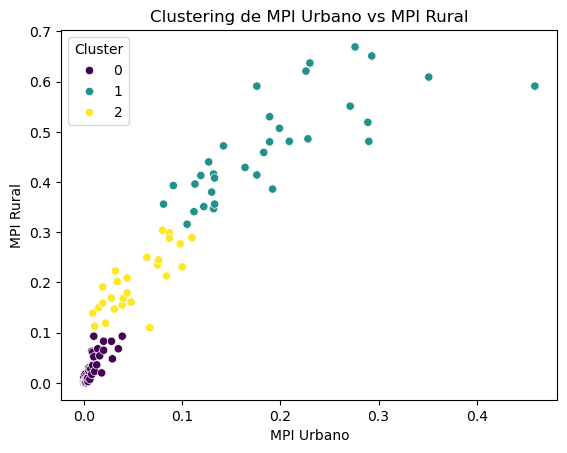

In [25]:
from sklearn.cluster import KMeans

# Aplicar KMeans clustering
X_cluster = mpi_data[['MPI Urban', 'Headcount Ratio Urban', 'Intensity of Deprivation Urban',
                      'MPI Rural', 'Headcount Ratio Rural', 'Intensity of Deprivation Rural']]
kmeans = KMeans(n_clusters=3, random_state=42)
mpi_data['Cluster'] = kmeans.fit_predict(X_cluster)

# Visualización de Clustering
sns.scatterplot(x=mpi_data['MPI Urban'], y=mpi_data['MPI Rural'], hue=mpi_data['Cluster'], palette='viridis')
plt.title('Clustering de MPI Urbano vs MPI Rural')
plt.xlabel('MPI Urbano')
plt.ylabel('MPI Rural')
plt.show()

# PCA (Reducción de Dimensionalidad)

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Preprocesamiento: Selección de características y objetivo
X_pca = mpi_data[['MPI Urban', 'Headcount Ratio Urban', 'Intensity of Deprivation Urban',
                  'MPI Rural', 'Headcount Ratio Rural', 'Intensity of Deprivation Rural']]
y_pca = mpi_data['Poverty Disparity'].map({'Urban Favorable': 0, 'Rural Favorable': 1, 'Equal MPI': 2}).dropna()

# Asegurarse de que las dimensiones coincidan después de eliminar NaN
X_pca = X_pca.loc[y_pca.index]

# Estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Aplicar PCA
pca = PCA(n_components=2)
X_pca_reduced = pca.fit_transform(X_scaled)

# Comparación de rendimientos antes y después de PCA con SVM
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_pca, test_size=0.3, random_state=42)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_reduced, y_pca, test_size=0.3, random_state=42)

# SVM con datos originales
svm_original = SVC(kernel='rbf', random_state=42)
svm_original.fit(X_train, y_train)
y_pred_original = svm_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

# SVM con datos reducidos por PCA
svm_pca = SVC(kernel='rbf', random_state=42)
svm_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = svm_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)

print(f"Accuracy antes de PCA: {accuracy_original}")
print(f"Accuracy después de PCA: {accuracy_pca}")

Accuracy antes de PCA: 0.9666666666666667
Accuracy después de PCA: 0.9666666666666667
